# Support Vector Machine

In [1]:
import os
import struct
from array import array

In [2]:
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [4]:

class MNIST(object):
    def __init__(self, path='.'):
        self.path = path

        self.test_img_fname = 't10k-images-idx3-ubyte'
        self.test_lbl_fname = 't10k-labels-idx1-ubyte'

        self.train_img_fname = 'train-images-idx3-ubyte'
        self.train_lbl_fname = 'train-labels-idx1-ubyte'

        self.test_images = []
        self.test_labels = []

        self.train_images = []
        self.train_labels = []

    def load_testing(self):
        ims, labels = self.loads(os.path.join(self.path, self.test_img_fname),
                                os.path.join(self.path, self.test_lbl_fname))

        self.test_images = ims
        self.test_labels = labels

        return ims, labels

    def load_training(self):
        ims, labels = self.loads(os.path.join(self.path, self.train_img_fname),
                                os.path.join(self.path, self.train_lbl_fname))

        self.train_images = ims
        self.train_labels = labels

        return ims, labels

    @classmethod
    def loads(cls, path_img, path_lbl):
        with open(path_lbl, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049,'
                                 'got {}'.format(magic))

            labels = array("B", file.read())

        with open(path_img, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051,'
                                 'got {}'.format(magic))

            image_data = array("B", file.read())

        images = []
        for i in range(size):
            images.append([0] * rows * cols)

        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]

        return images, labels


In [5]:
# Save all the Print Statements in a Log file.
old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file

In [6]:
#Loading MNIST Data
data = MNIST('./MNIST-Dataset/python-mnist/')

In [7]:
#Loading Training Data
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

In [8]:
#Loading Testing Data
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

In [9]:
#Features
X = train_img

#Labels
y = train_labels

# Prepare Classifier Training and Testing Data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)

#SVM Classifier with gamma = 0.1; Kernel = polynomial
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# Pickle the Classifier for Future Use

with open('MNIST_SVM.pickle','wb') as f:
    pickle.dump(clf, f)

pickle_in = open('MNIST_SVM.pickle','rb')
clf = pickle.load(pickle_in)

In [11]:
#Calculating Accuracy of trained Classifier
acc = clf.score(X_test,y_test)

#Making Predictions on Validation Data
y_pred = clf.predict(X_test)

#Calculating Accuracy of Predictions
accuracy = accuracy_score(y_test, y_pred)

#Creating Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)

In [12]:
#SVM Trained Classifier Accuracy:
acc

0.97633333333333339

In [13]:
#Predicted Values:
y_pred

array([8, 5, 2, ..., 4, 5, 1])

In [14]:
#Accuracy of Classifier on Validation Images:
accuracy

0.97633333333333339

In [15]:
#Confusion Matrix: 
conf_mat

array([[601,   0,   1,   0,   0,   1,   3,   0,   2,   0],
       [  0, 658,   1,   0,   1,   0,   1,   0,   3,   0],
       [  5,   0, 609,   1,   0,   1,   0,   3,   2,   0],
       [  0,   3,   9, 532,   0,   8,   0,   1,   7,   2],
       [  1,   1,   3,   0, 536,   1,   2,   2,   2,   3],
       [  2,   1,   2,   3,   1, 546,   1,   0,   1,   1],
       [  3,   1,   1,   0,   4,   2, 599,   0,   0,   0],
       [  0,   5,   2,   0,   2,   1,   0, 636,   2,   5],
       [  1,   1,   1,   5,   1,   2,   3,   0, 601,   0],
       [  2,   0,   0,   4,   8,   2,   0,   2,   0, 540]])

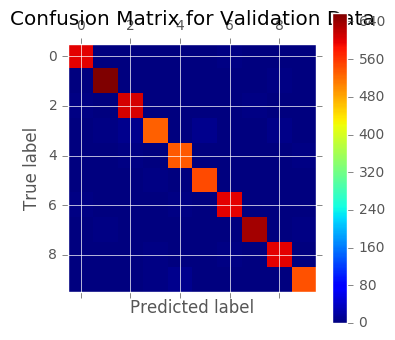

In [16]:
# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
#Making Predictions on Test Input Images
test_labels_pred = clf.predict(test_img)

#Calculating Accuracy of Trained Classifier on Test Data
acc = accuracy_score(test_labels,test_labels_pred)

#Creating Confusion Matrix for Test Data
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

In [18]:
#Predicted Labels for Test Images:
test_labels_pred

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
#Accuracy of Classifier on Test Images:
acc

0.97809999999999997

In [20]:
#Confusion Matrix for Test Data:
conf_mat_test

array([[ 972,    0,    1,    2,    0,    2,    1,    0,    2,    0],
       [   0, 1127,    2,    1,    0,    0,    3,    0,    2,    0],
       [   7,    1, 1004,    0,    2,    1,    4,    7,    5,    1],
       [   1,    2,    1,  988,    0,    4,    0,    4,    6,    4],
       [   3,    0,    2,    0,  964,    0,    4,    0,    1,    8],
       [   3,    0,    0,   11,    1,  866,    4,    1,    3,    3],
       [   4,    5,    2,    0,    3,    6,  936,    0,    2,    0],
       [   0,   11,    9,    2,    2,    0,    0,  998,    0,    6],
       [   4,    0,    2,    4,    2,    4,    1,    4,  950,    3],
       [   3,    6,    2,    6,    8,    4,    1,    1,    2,  976]])

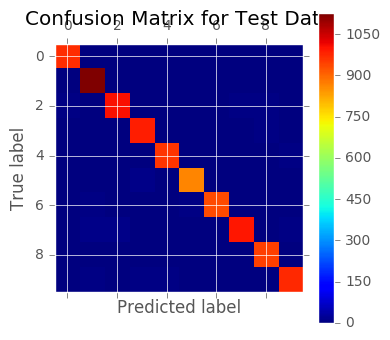

In [21]:
# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

sys.stdout = old_stdout
log_file.close()

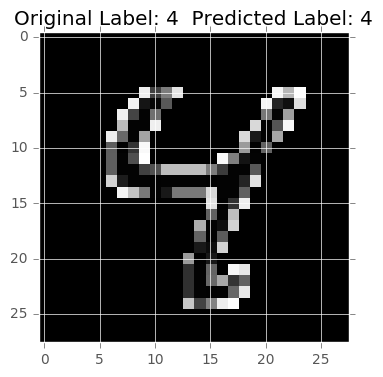

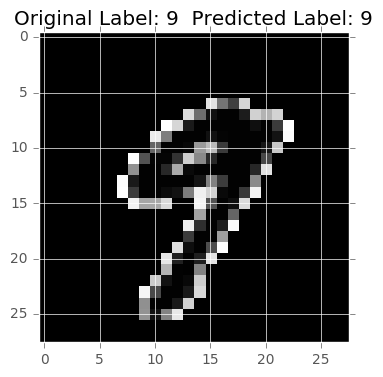

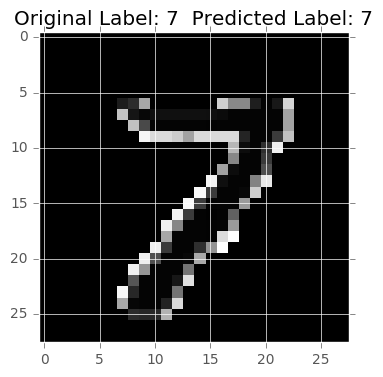

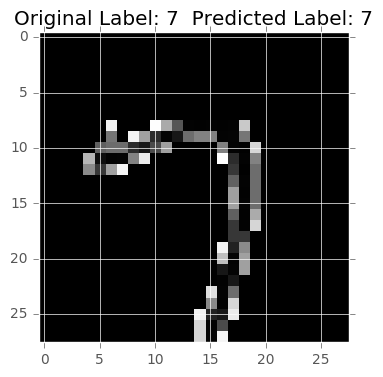

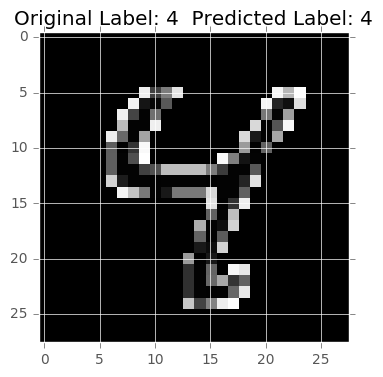

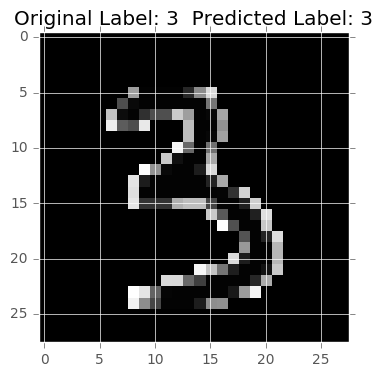

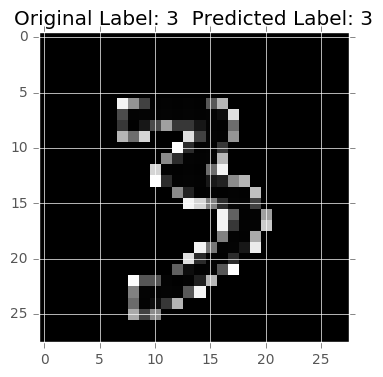

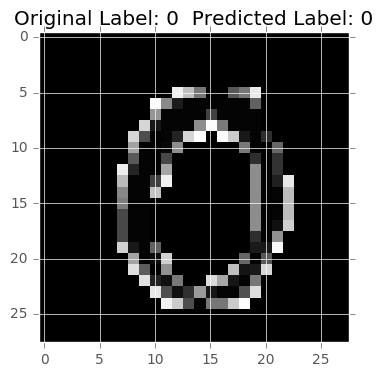

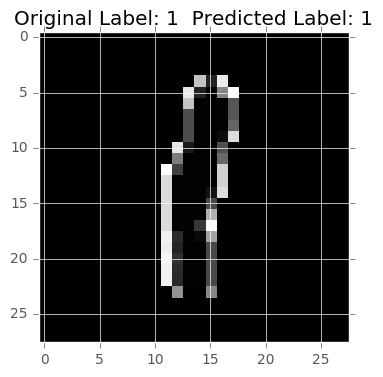

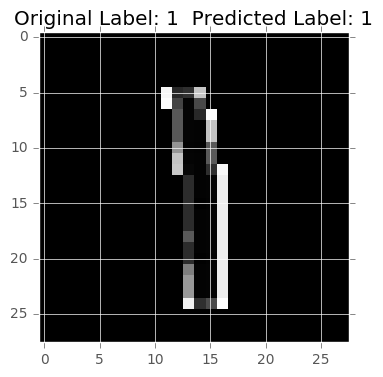

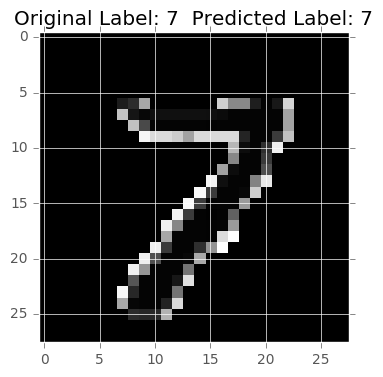

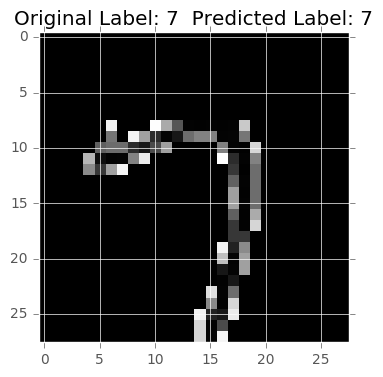

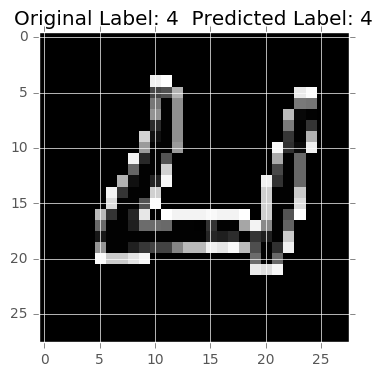

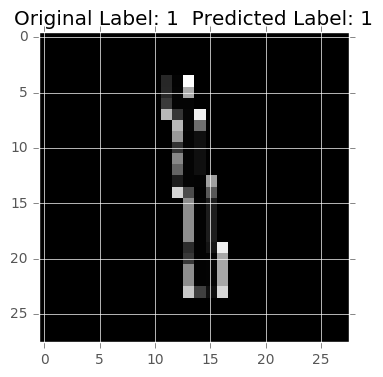

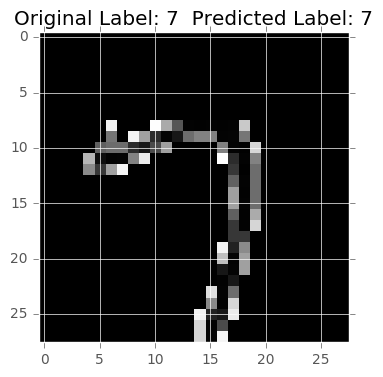

In [22]:

# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,40,15)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

